Work includes *Data PreProcessing, Vizualization, Modeling ( Linear Regression -Ridge, Lasso, Elastic Net) and Dimensionality reduction*

In [2]:
# import dependencies
import pandas as pd
import numpy as np

In [3]:
#read data from url
url=f"https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

In [4]:
#Column Names
attr_names=f"""ID	ID
Age	age
Gender	gender
Education	level of education
Country	country of current residence
Ethnicity	ethnicity
Nscore	NEO-FFI-R Neuroticism
Escore	NEO-FFI-R Extraversion
Oscore	NEO-FFI-R Openness
Ascore	NEO-FFI-R Agreeableness
Cscore	NEO-FFI-R Conscientiousness
Impulsive	BIS-11 Impulsiveness
SS	ImpSS sensation
Alcohol	alcohol consumption (output attribute)
Amphet	amphetamines consumption (output attribute)
Amyl	amyl nitrite consumption (output attribute)
Benzos	benzodiazepine consumption (output attribute)
Caff	caffeine consumption (output attribute)
Cannabis	cannabis consumption (output attribute)
Choc	chocolate consumption (output attribute)
Coke	cocaine consumption (output attribute)
Crack	crack consumption (output attribute)
Ecstasy	ecstasy consumption (output attribute)
Heroin	heroin consumption (output attribute)
Ketamine	ketamine consumption (output attribute)
Legalh	legal highs consumption (output attribute)
LSD	LSD consumption (output attribute)
Meth	methadone consumption (output attribute)
Mushrooms	magic mushrooms consumption (output attribute)
Nicotine	nicotine consumption (output attribute)
Semer	fictitious drug Semeron consumption (output attribute)
VSA	volatile substance abuse consumption (output attribute)"""

In [5]:
age_lbl=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
gender_lbl=["Male", "Female"]
education_lbl=["Left before 16", "Left at 16", "Left at 17", "Left at 18","Left at Uni", 
               "Certificate/Diploma", "University", "Masters", "PhD"]
country_lbl=["USA", "New Zealand", "Other", "Australia",  "Republic of Ireland", "Canada", "UK"]
ethnicity_lbl=["Black", "Asian", "White", "Mixed-White/Black", "Other", 
               "Mixed-White/Asian", "Mixed-Black/Asian"]
user_lbl=["Non-user", "Drug user"]
scores= ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]

In [6]:
# This function will get the data and combine variables
def get_url(url, title):
    df = pd.read_csv(url, header = None)
    title = [row.split("\t") for row in title.split(f"\n")]
    df.columns = pd.DataFrame(title)[0]
    display(df.info())
    print(f"""Missing values: """)
    display(df.isna().sum())
    print(f"""Head of Dataset: """)
    display(df.head())
    return df

In [7]:
df = get_url(url, attr_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

None

Missing values: 


0
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Head of Dataset: 


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [8]:
# We will drop ID column
df.drop(columns='ID',inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
%matplotlib inline
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

def transform(df):
    output = list(set(df.columns).difference(set(df._get_numeric_data().columns)))
    for o in output:
        le = LabelEncoder()
        df[o] = le.fit_transform(df[o])
    return output

o_attributes = transform(df)

### Distribution of scores

In [10]:
def plot(df,scores):
    plot_name = "plot {}.png"
    sns.set(style = "dark", font_scale = 1.2)
    for score in scores:
        fig = plt.figure(figsize = (6,4))
        sns.distplot(df[score],color='r')
        plt.title(f"Distribution of {score}")
        plt.xlabel(score)
        plt.ylabel("Frequency")
        plt.show()
    return None

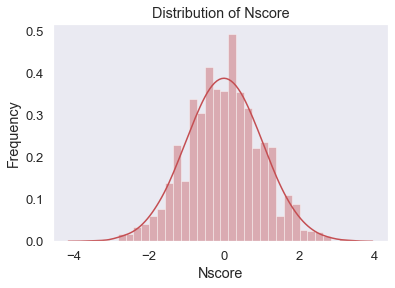

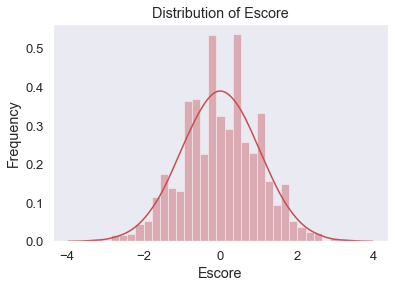

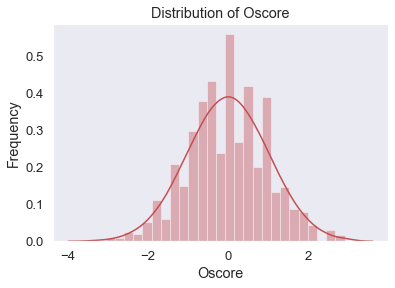

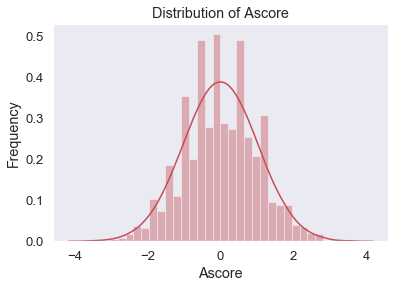

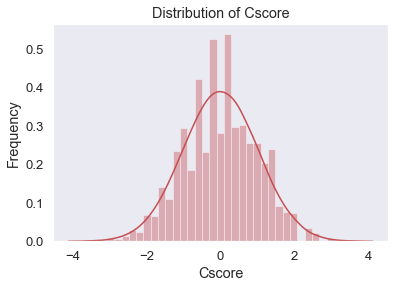

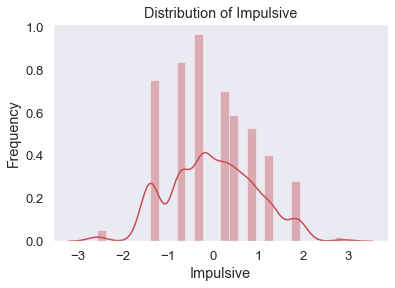

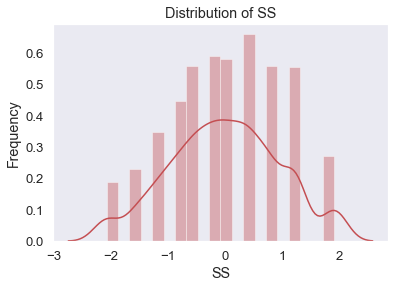

In [11]:
plot(df,scores)

Scores are normally distributed except Impulsive and SS.

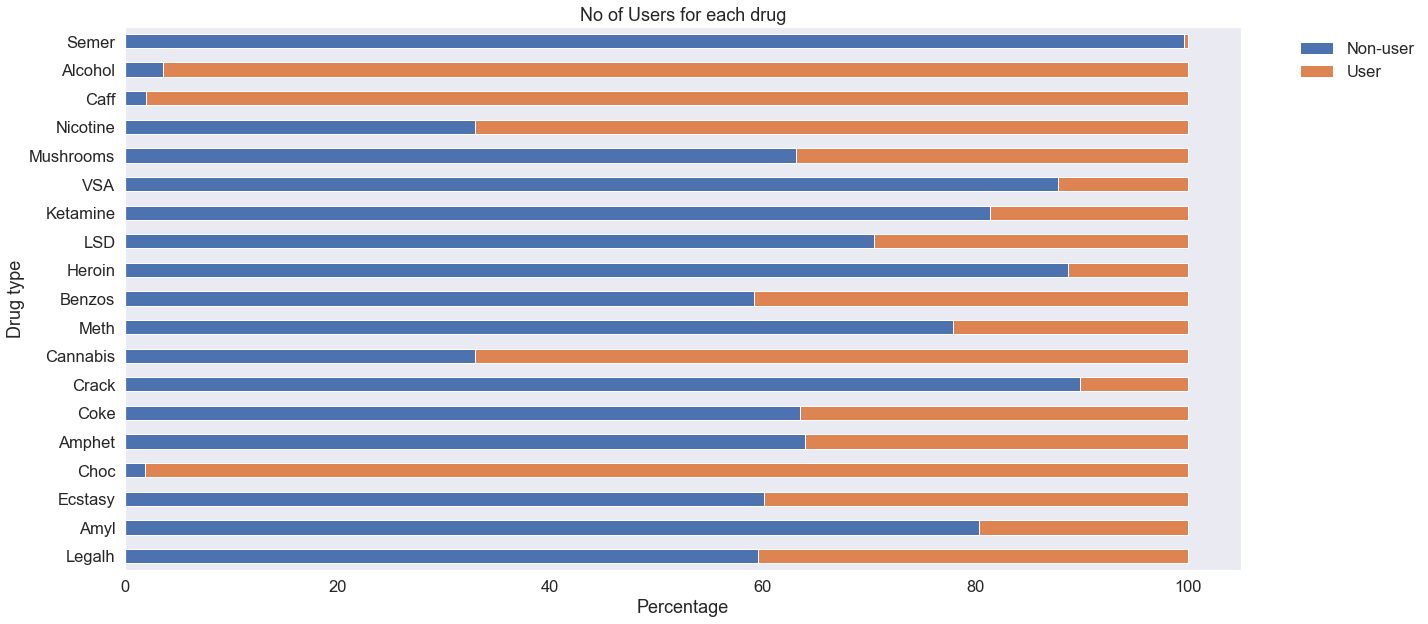

In [12]:
pivot = []
for c in o_attributes:
    x = df[c].value_counts(normalize = True)
    pivot.append(pd.Series(data=[c, x[x.index<2].sum()*100,
                                x[x.index>=2].sum()*100]))
x=pd.DataFrame(data=pivot)
x.set_index(0, drop=True, inplace=True)
x.columns=["Non-user","User"]

plt.style.use('seaborn-darkgrid')
sns.set(style = "dark",font_scale=1.5)
x.plot.barh(stacked=True, figsize = (20,10), title = "No of Users for each drug")
plt.ylabel("Drug type")
plt.xlabel("Percentage")
plt.legend(bbox_to_anchor = (1.04, 1), loc = "upper left")
plt.show()

It can be seen that Alcohol, Caffeine and Choc types are widely used among drug users.

### Drug Consumption distribution among Male and Female
I divided drug types into hard and soft. In this work we are focusing on hard drugs. More on drug types can be found on https://www.verywellmind.com/the-difference-between-soft-drugs-and-hard-drugs-22308

In [18]:
hard_drugs=["Amphet", "Benzos", "Coke", "Crack", "Ecstasy", "Heroin", "Legalh", "Meth"]
df["drug_use"]=df[df[hard_drugs]>1][hard_drugs].count(axis=1)
df["hard"]=df[df[hard_drugs]>1].any(axis=1)

In [14]:
def drug_use(df, demo):
    plt.style.use("seaborn-darkgrid")
    plot_name = "grug user by {}.png"
    sns.set(style="white", font_scale=1.5)
    
    for d in demo:
        f, ax = plt.subplots(figsize =(14,7))
        label = eval(d.lower() + "_lbl")
        
        p = round(pd.pivot_table(df[df.hard==True], values = "hard", columns = "Gender", index = d,
                                 aggfunc = "count")/pd.pivot_table(df, values = "hard", columns = "Gender",
                                                                 index = d, aggfunc = "count")*100,3).reset_index().melt(id_vars = [d])
        g = sns.barplot(x= d, y = "value", data = p, hue = "Gender",palette = ["b","r"])
        g.set_xticklabels(label)
        g.set_xlabel(f"{d} group")
        g.set_ylabel("Drug user percentage")
        g.set_title(f"Distribution of Drug user by {d} and Gender")
        for t, l in zip(g.legend().texts, gender_lbl): 
            t.set_text(l)
        g.set_xticklabels(g.get_xticklabels(), rotation = 15)
        plt.show()
    return None

In [15]:
demo =["Age", "Education", "Country", "Ethnicity"]

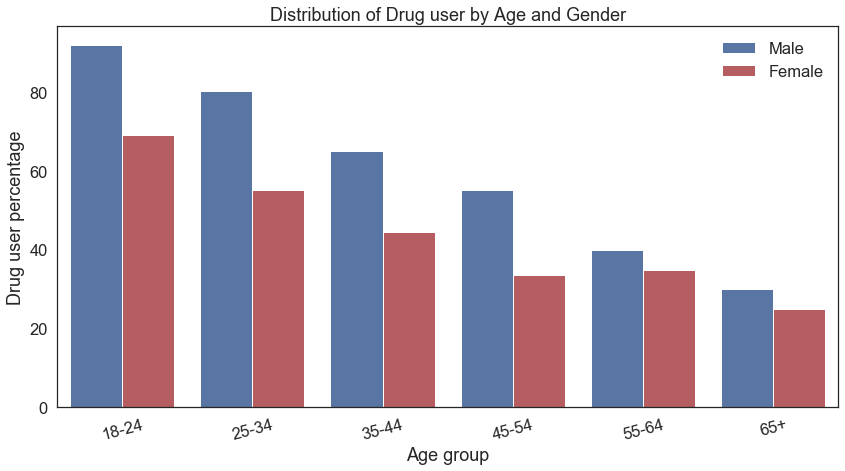

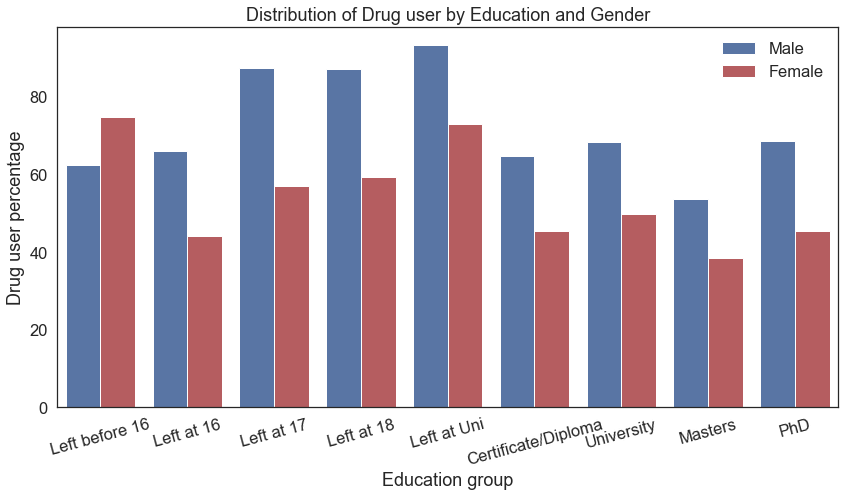

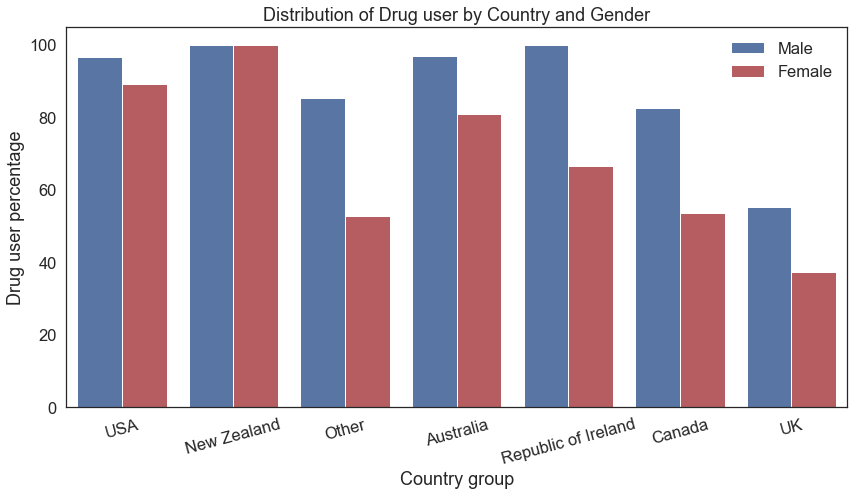

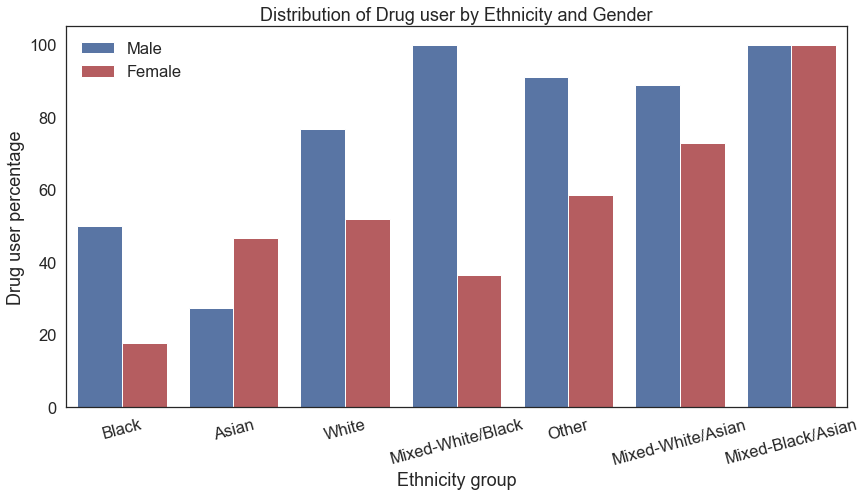

In [16]:
drug_use(df, demo)

In [27]:
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,drug_use
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,...,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422,2.370292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,...,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375,2.437274
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,...,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000,4.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000,8.000000


### Relationship between Variables

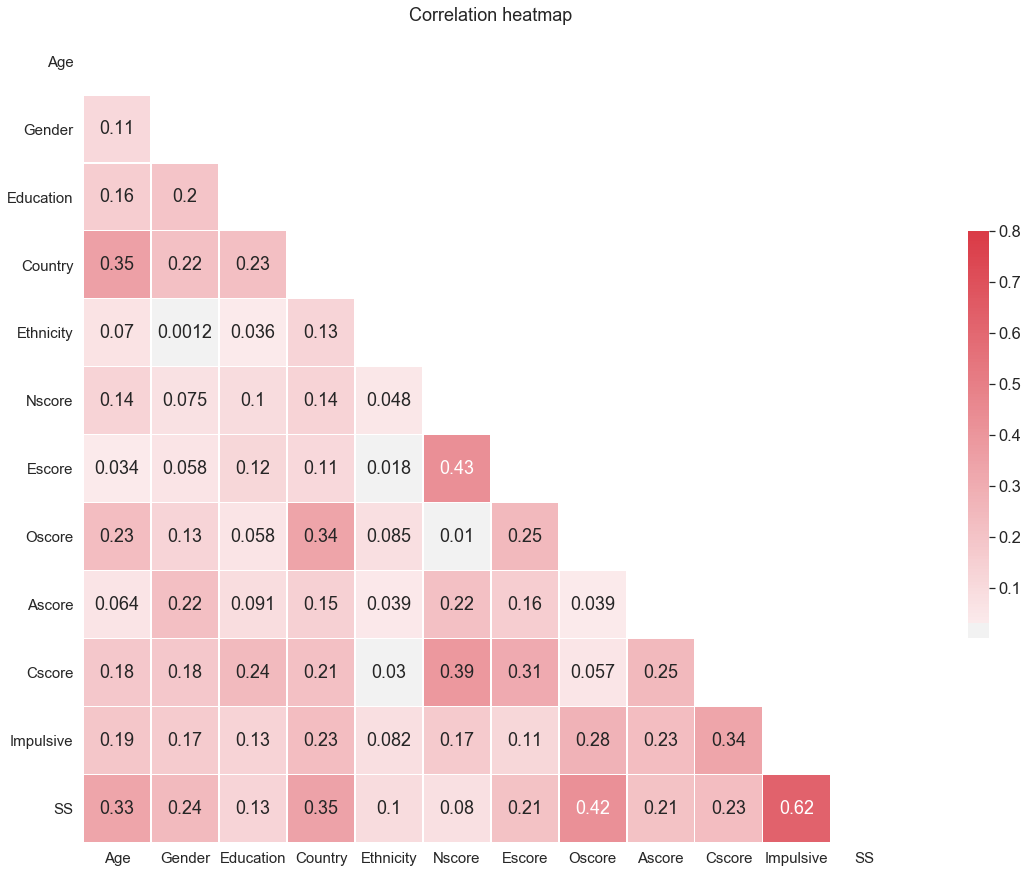

In [28]:
# reference: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style = "white", font_scale = 1.5)
corr = abs(df.loc[:,"Age":"SS"].corr())

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype = bool))

f,ax = plt.subplots(figsize = (25, 15))
cmap = sns.diverging_palette(240, 10, as_cmap= True)
sns.heatmap(corr, mask = mask, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap= cmap, vmax = .8, center = 0, annot = True,
           square = True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation heatmap")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("")
plt.ylabel("")
plt.show()

The Correlation heatmap shows relationship among variables,scores, and there is no any multicollinearity in our data set, the highest correalation is between Sensation seeing and Impulsive.

In [30]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA', 'drug_use', 'hard'],
      dtype='object', name=0)

### Linear Regression
 We will perform Linear Regression Analysis to model the relationship between a scalar response (or dependent variable) and explanatory variables (or independent variables)

In [31]:
#Our predictor variables include demographic information and scores
X = df. loc[:, "Age": "SS"]
#target variable includes hard drug use (True, False)
y = df.hard

In [32]:
#split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

In [33]:
# We need to first normalize our data,so that all attributes are in the same scale
min_max_scaler = MinMaxScaler().fit(X_train)
X_train_norm = min_max_scaler.transform(X_train)
X_test_norm = min_max_scaler.transform(X_test)

Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). Compute the RMSE value on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [34]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [51]:
#compute the RMSE on the full training data
w = standRegres(X_train_norm, y_train)

xMat = np.mat(X_train_norm)
yMat = np.mat(y_train)

yHat = xMat * w
yHat = yHat.A.ravel()

In [52]:
err = abs(yHat - y_train)

#sum of squared errors
total_error = np.dot(err,err)

In [53]:
rmse_train = np.sqrt(total_error/len(yHat))
print("RMSE on Training data: ",round(rmse_train,3))

RMSE on Training data:  0.393


Text(0, 0.5, 'Predicted')

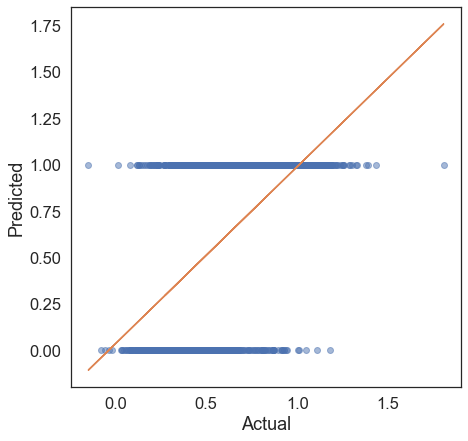

In [54]:
plt.plot(yHat, y_train, 'o', alpha=0.5)
# m = slope, b=intercept
m, b = np.polyfit(yHat, y_train, 1)
plt.plot(yHat, m*yHat + b)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [56]:
for i in range(len(X_train.columns)):
    print("%7s   %2.2f" % (X_train.columns[i], w[i]))

    Age   -0.16
 Gender   -0.11
Education   -0.13
Country   -0.22
Ethnicity   0.94
 Nscore   0.46
 Escore   0.08
 Oscore   0.45
 Ascore   0.07
 Cscore   -0.17
Impulsive   0.08
     SS   0.36


In [57]:
from sklearn.model_selection import KFold

n=10

kf = KFold(n_splits = n, random_state=22, shuffle=True)
xval_err = 0
f = 1
for train, test in kf.split(X_train_norm):
    X_fold_train = X_train_norm[X_train.index.isin(train)]
    y_fold_train = y_train[y_train.index.isin(train)]
    w=standRegres(X_fold_train,y_fold_train)
    
    xMat = np.mat(X_fold_train)
    yMat = np.mat(y_fold_train)
    yHat = xMat*w
    yHat = yHat.A.ravel()
    
    err = abs(yHat - y_fold_train)
    total_error = np.dot(err,err)
    
    rmse = np.sqrt(np.dot(err,err)/len(X_fold_train))
    print("Fold %2d RMSE: %.4f" % (f,rmse))
    xval_err += rmse
    f+=1

Fold  1 RMSE: 0.3967
Fold  2 RMSE: 0.3949
Fold  3 RMSE: 0.3948
Fold  4 RMSE: 0.4000
Fold  5 RMSE: 0.3931
Fold  6 RMSE: 0.3957
Fold  7 RMSE: 0.3977
Fold  8 RMSE: 0.3947
Fold  9 RMSE: 0.3952
Fold 10 RMSE: 0.3980


In [58]:
cv=xval_err/n
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f'%cv)

Method: Simple Linear Regression
RMSE on training: 0.3934
RMSE on 10-fold CV: 0.3961


Feature Selection: use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables.

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,SGDRegressor
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score, cross_validate

linreg = LinearRegression()
percentiles = range(5,101,5)
results = []

for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train_norm, y_train)
    scores = cross_val_score(linreg, X_train_fs,y_train, cv=5)
    print("%2d %0.4f" % (i, scores.mean()))
    results = np.append(results,scores.mean())

 5 0.2009
10 0.2718
15 0.2718
20 0.2838
25 0.2838
30 0.2912
35 0.2912
40 0.3155
45 0.3155
50 0.3151
55 0.3235
60 0.3235
65 0.3283
70 0.3283
75 0.3299
80 0.3299
85 0.3287
90 0.3287
95 0.3294
100 0.3286


In [61]:
# optimal percentage of the most informative features to use
optimal_percentile_ind = np.where(results ==results.max())[0][0]
print(optimal_percentile_ind)

14


Optimal percentile of features:75 

Optimal number of features:9 



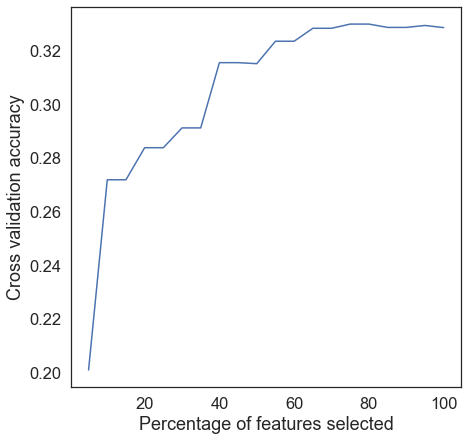

In [62]:
optimal_percentile_ind = np.where(results==results.max())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind] * len(X.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

import pylab as pl
pl.rcParams["figure.figsize"] = (7,7)
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [63]:
#Show the list of most informative variables and their weights
#fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i) 
most_informative = []
for i in range(len(X.columns.values)):
    if fs.get_support()[i]:
        t = (X.columns.values[i], fs.scores_[i])
        most_informative.append(t)
most_informative.sort(key=lambda x:x[1], reverse=True)

In [64]:
#printing only variables with weights greater than or equal to 100
for i in range(len(most_informative)):
    if most_informative[i][1]>=100:
        print("{0}\t\t{1}\t\t{2}".format(i+1, most_informative[i][0], round(most_informative[i][1],3)))
    else:
        break

1		Country		386.328
2		SS		302.345
3		Age		175.251
4		Oscore		169.004
5		Cscore		148.373
6		Impulsive		143.466
7		Gender		112.942


In [65]:
# train your model on the full 80% training data and evaluate it using the set-aside 20% test partition.
linreg.fit(X_train_norm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
p=linreg.predict(X_test_norm)
err = abs(p-y_test)
print(err[:10])

1839    0.079389
1496    0.180156
1819    0.103703
1725    0.431137
1148    0.071331
555     0.495204
590     0.481487
1003    0.042106
478     0.267946
46      0.355712
Name: hard, dtype: float64


In [67]:
total_err = np.dot(err,err)
rmse_test = np.sqrt(total_err/len(p))
print("RMSE on Test: ",rmse_test)

RMSE on Test:  0.3865838246642764


Next, we will  perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case,we perform systematic model selection to identify the optimal alpha parameter. We are creating a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, we will also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha values, we will train the model on the full training data and evaluate it on the set-aside test data.

In [68]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    #Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    #initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    #iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        #set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        #initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        #create KFold cross-validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        #iterate over K folds
        j = 0
        for train, test in cv.split(X):
            #fit the classifier in the corresponding fold
            #and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
        
        #store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print('{} = {}, train score: {}'.format(param_name, param_value, train_scores[i]))
        
    #plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label = "Train", alpha = 0.4, lw = 2, c = 'b')
    plt.plot(param_values, test_scores, label = "X-Val", alpha = 0.4, lw = 2, c = 'g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    
    #return the training and testing scores on each parameter value
    return train_scores, test_scores

alpha = 0.01, train score: 0.3438361950444654
alpha = 0.41795918367346935, train score: 0.3437993397371402
alpha = 0.8259183673469387, train score: 0.34371385742062843
alpha = 1.233877551020408, train score: 0.3435994966550817
alpha = 1.6418367346938774, train score: 0.34346703484343005
alpha = 2.0497959183673466, train score: 0.3433226682769087
alpha = 2.457755102040816, train score: 0.3431701213224996
alpha = 2.865714285714285, train score: 0.3430117231506705
alpha = 3.2736734693877545, train score: 0.342848985000642
alpha = 3.681632653061224, train score: 0.3426829224819387
alpha = 4.0895918367346935, train score: 0.3425142418067113
alpha = 4.497551020408163, train score: 0.3423434506353999
alpha = 4.905510204081632, train score: 0.3421709257981126
alpha = 5.313469387755101, train score: 0.3419969556537118
alpha = 5.721428571428571, train score: 0.3418217671653473
alpha = 6.12938775510204, train score: 0.3416455435644278
alpha = 6.537346938775509, train score: 0.34146843610471767
al

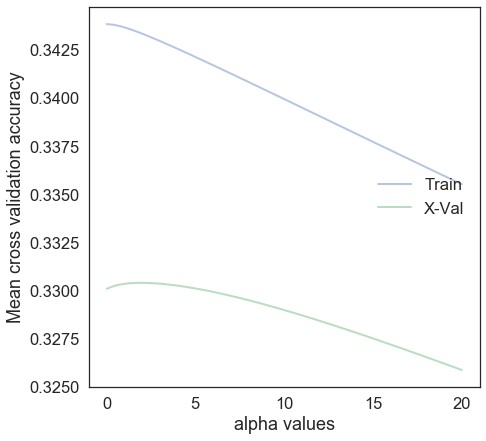

In [69]:
alpha = np.linspace(.01, 20, 50)
ridge = Ridge(alpha = alpha)

train_scores, test_scores = calc_params(X_train_norm, y_train, ridge, alpha, 'alpha',5)

In [70]:
print(np.argmax(train_scores))
print(np.argmax(test_scores))

0
5


In [71]:
#Linear regression with Ridge coef
ridge = Ridge(alpha=alpha[2])

ridge.fit(X_train_norm, y_train)

Ridge(alpha=0.8259183673469387, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
#RMSE on testing data
p = ridge.predict(X_test_norm)
err = p - y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

print("RMSE on testing (Ridge): ",rmse_test)

RMSE on testing (Ridge):  0.3861172574874439


alpha = 0.0001, train score: 0.34380714706231225
alpha = 0.0009142857142857143, train score: 0.3418792924960122
alpha = 0.0017285714285714285, train score: 0.3392530267999777
alpha = 0.0025428571428571423, train score: 0.3371267395193964
alpha = 0.0033571428571428567, train score: 0.3344854530129794
alpha = 0.004171428571428572, train score: 0.33122319589672766
alpha = 0.004985714285714285, train score: 0.32736125838627766
alpha = 0.0058, train score: 0.32288201578741893
alpha = 0.006614285714285714, train score: 0.31805165490151366
alpha = 0.0074285714285714285, train score: 0.31295606195656944
alpha = 0.008242857142857142, train score: 0.3076908684885337
alpha = 0.009057142857142856, train score: 0.3023911320226846
alpha = 0.00987142857142857, train score: 0.2977290606141019
alpha = 0.010685714285714284, train score: 0.2929136207975081
alpha = 0.011499999999999998, train score: 0.2886428090137062
alpha = 0.012314285714285713, train score: 0.28596512402372837
alpha = 0.013128571428571

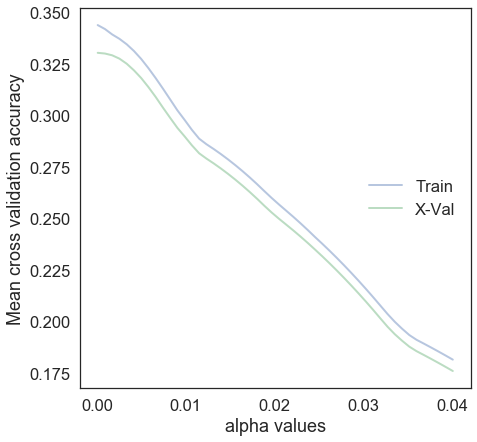

In [73]:
#perform Lasso Regression
alpha = np.linspace(.0001,.04,50)
lasso = Lasso(alpha=alpha)

train_scores, test_scores = calc_params(X_train_norm, y_train, lasso, alpha, 'alpha', 5)

In [74]:
lasso = Lasso(alpha = test_scores[0])
lasso.fit(X_train_norm, y_train)

Lasso(alpha=0.33033758096092986, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
#RMSE on test
p = lasso.predict(X_test_norm)
err = p - y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

print("RMSE on testing using LASSO: ", rmse_test)

RMSE on testing using LASSO:  0.48179986484688814


Linear Regression and Ridge Regression seem to minimize the root-mean-square-error(RMSE) better than Lasso, we would definitely drop Lasso as its RMSE value almost twice as bad as those two.

Next, we perform regression using Stochastic Gradient Descent for regression. For this part, we use the SGDRegessor module from sklearn.linear_model. Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing.

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sgd = scaler.transform(X_train)

In [77]:
from sklearn.model_selection import GridSearchCV

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.01, 20, 50),
}
grid_search = GridSearchCV(sgdreg, parameters, verbose=1, cv =5)

In [78]:
grid_search.fit(X_train_sgd, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_star...
       1.30646939e+01, 1.34726531e+01, 1.38806122e+01, 1.42885714e+01,
       1.46965306e+01, 1.51044898e+01, 1.55124490e+01, 1.59204082e+01,
       1.63283673e+01, 1.67363265e+01, 1.71442857e+01, 1.75522449e+01,
       1.79602041e+01, 1.83681633e+01, 1.87761224e+01, 1.91840816e+01,
     

In [79]:
best_params = grid_search.best_params_
best_params, grid_search.best_score_

({'alpha': 0.01, 'penalty': 'l2'}, 0.3272470432125739)

In [80]:
sgdreg = SGDRegressor(penalty = best_params['penalty'], alpha = best_params['alpha'])
sgdreg.fit(X_train_sgd,y_train)

scaler.fit(X_test)
X_test_sgd = scaler.transform(X_test)

#Computing RMSE on testing data
p =sgdreg.predict(X_test_sgd)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print("SGD RMSE mean on testing: ",np.mean(rmse_test))

SGD RMSE mean on testing:  0.3871693764972275


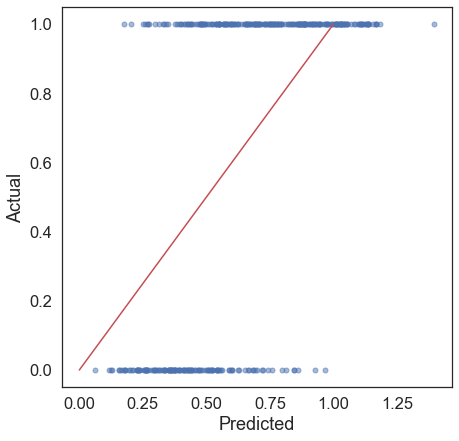

In [81]:
pl.plot(p, y_test, 'o',markersize=5, alpha=.5)
pl.plot([0,1],[0,1],'r-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

l1_ratio = 0.0, train score: 0.34288770178701033
l1_ratio = 0.010101010101010102, train score: 0.342983327821431
l1_ratio = 0.020202020202020204, train score: 0.34268946186014093
l1_ratio = 0.030303030303030304, train score: 0.3432088120769418
l1_ratio = 0.04040404040404041, train score: 0.34276656697448765
l1_ratio = 0.05050505050505051, train score: 0.3430587129480319
l1_ratio = 0.06060606060606061, train score: 0.34328193230512416
l1_ratio = 0.07070707070707072, train score: 0.3431693734359936
l1_ratio = 0.08080808080808081, train score: 0.343363621387928
l1_ratio = 0.09090909090909091, train score: 0.34278755810809614
l1_ratio = 0.10101010101010102, train score: 0.3430998907510505
l1_ratio = 0.11111111111111112, train score: 0.34313089607699837
l1_ratio = 0.12121212121212122, train score: 0.34328798994556264
l1_ratio = 0.13131313131313133, train score: 0.3414415252108608
l1_ratio = 0.14141414141414144, train score: 0.34335438133796076
l1_ratio = 0.15151515151515152, train score: 0.

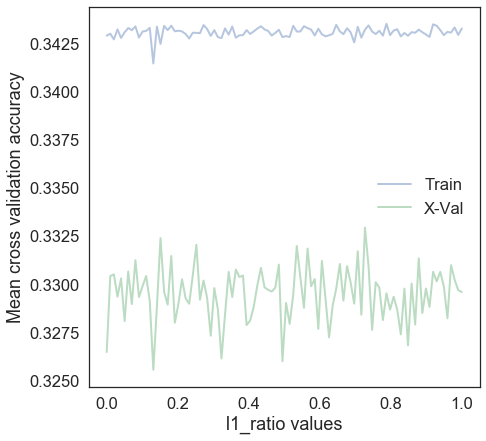

In [82]:
sgdreg = SGDRegressor(penalty='elasticnet')
l1_ratio = np.linspace(0, 1, 100)

train_scores, test_scores = calc_params(X_train_sgd, y_train, sgdreg, l1_ratio, 'l1_ratio', 5)

In [83]:
print('Best l1 ratio: ',l1_ratio[np.argmax(test_scores)])

Best l1 ratio:  0.7272727272727273


In [84]:
best_l1_ratio = l1_ratio[np.argmax(test_scores)]
sgdreg = SGDRegressor(penalty='elasticnet', l1_ratio=best_l1_ratio)

sgdreg.fit(X_train_sgd,y_train)

scaler.fit(X_test)
X_test_sgd = scaler.transform(X_test)

#RMSE on test
p = sgdreg.predict(X_test_sgd)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))
print('SGD RMSE on testing: ', np.mean(rmse_test))

SGD RMSE on testing:  0.38752886776513495


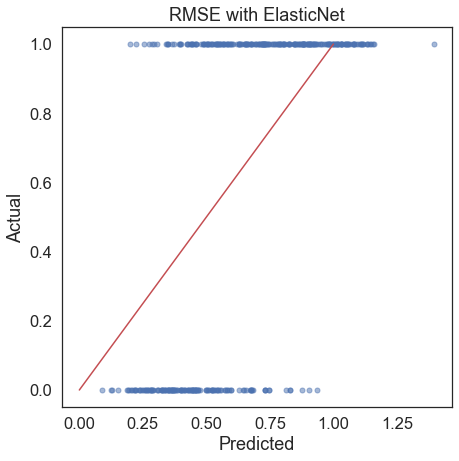

In [85]:
pl.plot(p,y_test, 'bo', markersize=5, alpha=.5)
pl.plot([0,1],[0,1],'r-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.title('RMSE with ElasticNet')
pl.show()

Compared to Lasso, this Ridge regularization term decreased the values of coefficients, but was unable to force a coefficient to exactly 0. This makes ridge regression’s use limited with regards to feature selection. Elastic Net included both L-1 and L-2 norm regularization terms. This gave us the benefits of both Lasso and Ridge regression. It was found to have predictive power better than Lasso, while still performing feature selection. 

## Calculate different types of models
### KNN Classifier
We will run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, we should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. 

In [ ]:
#X = df. loc[:, "Age": "SS"]
#y = df.hard

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

min_max_scaler = MinMaxScaler().fit(X_train)
X_train_norm = min_max_scaler.transform(X_train)
X_test_norm = min_max_scaler.transform(X_test)

In [103]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train_norm, y_train) 
  
    training_score = clf.score(X_train_norm, y_train) 
    test_score = clf.score(X_test_norm, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [104]:
for keys, values in scores.items(): 
    print(keys, ':', values) 

2 : [0.8521220159151194, 0.6896551724137931]
3 : [0.8614058355437666, 0.7347480106100795]
4 : [0.8348806366047745, 0.7506631299734748]
5 : [0.8295755968169761, 0.7586206896551724]
6 : [0.8169761273209549, 0.76657824933687]
7 : [0.8169761273209549, 0.7586206896551724]
8 : [0.8050397877984085, 0.7639257294429708]
9 : [0.8103448275862069, 0.7692307692307693]
10 : [0.7997347480106101, 0.7824933687002652]
11 : [0.7964190981432361, 0.7745358090185677]
12 : [0.7970822281167109, 0.7798408488063661]
13 : [0.7911140583554377, 0.7718832891246684]
14 : [0.7838196286472149, 0.7745358090185677]
15 : [0.7924403183023873, 0.7851458885941645]
16 : [0.7877984084880637, 0.7824933687002652]
17 : [0.7824933687002652, 0.8037135278514589]
18 : [0.7818302387267905, 0.7904509283819628]
19 : [0.7871352785145889, 0.7851458885941645]
20 : [0.7858090185676393, 0.7957559681697612]


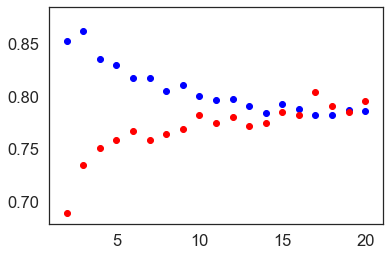

In [106]:
%matplotlib inline
plt.scatter(K, training, color ='blue') 
plt.scatter(K, test, color ='red') 
plt.show() 

In [112]:
knn = KNeighborsClassifier(n_neighbors = 13) 
clf_knn= knn.fit(X_train, y_train)

# predicting test set results 
y_pred = knn.predict(X_test)

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

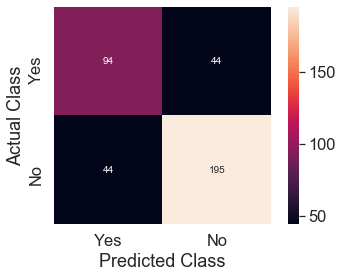

In [113]:
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
ax = plt.subplot()
sns.heatmap(cm, square=True, annot=True, fmt='d',ax=ax)
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
ax.xaxis.set_ticklabels(["Yes", "No"])
ax.yaxis.set_ticklabels(["Yes", "No"])

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.68      0.68      0.68       138
        True       0.82      0.82      0.82       239

    accuracy                           0.77       377
   macro avg       0.75      0.75      0.75       377
weighted avg       0.77      0.77      0.77       377



### Decision tree classifier
Using the normalized training and test data, we perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores the classifier. Compare the average accuracy score on the test and the training data sets. 

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=33)

In [202]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_predictor = tree_clf.predict(X_test)

In [203]:
print(classification_report(y_test, tree_predictor))

              precision    recall  f1-score   support

       False       0.68      0.64      0.66       138
        True       0.80      0.83      0.81       239

    accuracy                           0.76       377
   macro avg       0.74      0.73      0.74       377
weighted avg       0.76      0.76      0.76       377



In [204]:
print("Accuracy score with Decision Tree classifier for normalized data is {0:0.1f}%".
      format(tree_clf.score(X_test,y_test)*100))

Accuracy score with Decision Tree classifier for normalized data is 75.9%


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

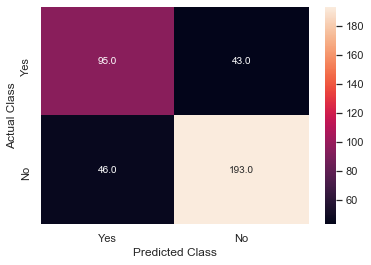

In [205]:
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, knn_predict_test), annot = True, fmt=".1f",ax = ax)
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
ax.xaxis.set_ticklabels(["Yes", "No"])
ax.yaxis.set_ticklabels(["Yes", "No"])

In [206]:
print("Avg accuracy on TRAIN data: ",tree_clf.score(X_train, y_train))
print("Avg accuracy on TEST data: ",round(tree_clf.score(X_test, y_test),2))

Avg accuracy on TRAIN data:  1.0
Avg accuracy on TEST data:  0.76


### Naive Bayes

In [190]:
X = df. loc[:, "Age": "SS"]
y = df.hard

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 33)

In [118]:
min_max_scaler = MinMaxScaler().fit(X_train)
X_train_norm = min_max_scaler.transform(X_train)
X_test_norm = min_max_scaler.transform(X_test)

In [119]:
from sklearn import naive_bayes

n_b = naive_bayes.GaussianNB()
n_b = n_b.fit(X_train_norm, y_train)

In [120]:
from sklearn.model_selection import cross_val_score
cv1 = cross_val_score(n_b, X, y, cv=10)
print(cv1)

[0.55555556 0.67195767 0.74603175 0.92063492 0.84126984 0.79255319
 0.79255319 0.79787234 0.7287234  0.87234043]


In [121]:
print("Naive Bayes overall accuracy: %0.2f (+/- %0.2f)" % (cv1.mean(), cv1.std()*2))
print("Accuracy on Training: {}".format(round(n_b.score(X_train_norm, y_train),3)))
print("Accuracy on Testing: {}".format(round(n_b.score(X_test_norm, y_test),3)))

Naive Bayes overall accuracy: 0.77 (+/- 0.20)
Accuracy on Training: 0.781
Accuracy on Testing: 0.788


In [122]:
d_tree = tree.DecisionTreeClassifier(criterion = "gini")
d_tree = d_tree.fit(X_train_norm, y_train)

In [123]:
cv2 = cross_val_score(d_tree, X, y, cv = 10)
print(cv2)

[0.52910053 0.61375661 0.65079365 0.76719577 0.70899471 0.67553191
 0.71276596 0.74468085 0.68617021 0.80319149]


In [124]:
print("Decision Tree overall accuracy: %0.2f (+/- %0.2f)" % (cv2.mean(), cv2.std()*2))
print("Accuracy on Training: {}".format(d_tree.score(X_train_norm, y_train)))
print("Accuracy on Testing: {}".format(d_tree.score(X_test_norm, y_test)))

Decision Tree overall accuracy: 0.69 (+/- 0.15)
Accuracy on Training: 1.0
Accuracy on Testing: 0.7347480106100795


### Linear Discriminant Analysis

In [125]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

LDA = lda()
LDA = LDA.fit(X_train_norm, y_train)

In [126]:
cv3 = cross_val_score(LDA, X, y, cv = 10)
print(cv3)

[0.54497354 0.73015873 0.75661376 0.9047619  0.84126984 0.79787234
 0.78723404 0.81914894 0.75       0.84574468]


In [127]:
print("Linear Discriminant analysis overall accuracy: %0.2f (+/- %0.2f)" % (cv3.mean(), cv3.std()*2))
print("Accuracy on Training: {}".format(LDA.score(X_train_norm, y_train)))
print("Accuracy on Testing: {}".format(LDA.score(X_test_norm, y_test),3))

Linear Discriminant analysis overall accuracy: 0.78 (+/- 0.18)
Accuracy on Training: 0.7858090185676393
Accuracy on Testing: 0.7904509283819628


#### Next we plot (receiver operating characteristic curve) showing the performance of a classification model at all classification thresholds.
reference:https://medium.com/@lily_su/confusion-matrix-roc-auc-and-imbalanced-classes-in-logistic-regression-5c7ead3deefc

In [208]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [209]:
y_score1 = clf_knn.predict_proba(X_test)[:,1]
y_score2 = tree_clf.predict_proba(X_test)[:,1]
y_score3 = n_b.predict_proba(X_test)[:,1]
y_score4 = LDA.predict_proba(X_test)[:,1]

In [210]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)

In [211]:
print('roc_auc_score for KNN: {0:0.2f}'.format (roc_auc_score(y_test, y_score1)))
print('roc_auc_score for Decision tree: {0:0.2f}'.format (roc_auc_score(y_test, y_score2)))
print('roc_auc_score for Naive Bayes: {0:0.2f}'.format (roc_auc_score(y_test, y_score3)))
print('roc_auc_score for LDA: {0:0.2f}'.format (roc_auc_score(y_test, y_score4)))

roc_auc_score for KNN: 0.84
roc_auc_score for Decision tree: 0.73
roc_auc_score for Naive Bayes: 0.75
roc_auc_score for LDA: 0.83


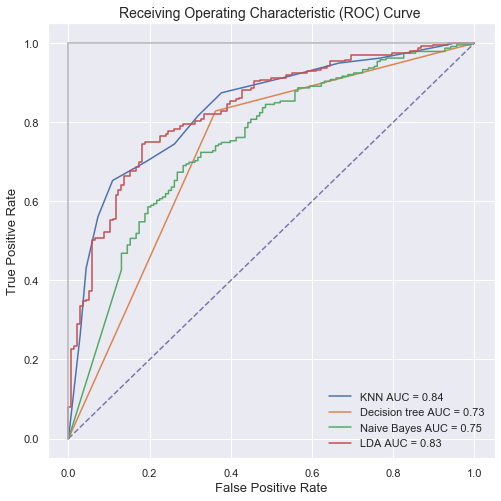

In [212]:
sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize= (8,8))
plt.plot(false_positive_rate1, true_positive_rate1, label="KNN AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score1)))
plt.plot(false_positive_rate2, true_positive_rate2, label="Decision tree AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score2)))
plt.plot(false_positive_rate3, true_positive_rate3, label="Naive Bayes AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score3)))
plt.plot(false_positive_rate4, true_positive_rate4, label="LDA AUC = {0:0.2f}".format (roc_auc_score(y_test, y_score4)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize= 13)
plt.xlabel('False Positive Rate', fontsize= 13)
plt.title('Receiving Operating Characteristic (ROC) Curve ', fontsize= 14)
plt.legend()
plt.show()

Receiving operating curves show the trend between the models we built, ROC is higher for KNN (13) and LDA than Decision trees and Naive bayes.KNN and LDA show the highest results for test set, and can expect for around 84 % that one would be a hard drug user by using demographic and personal test scores.

Next we continue with dimensionality reduction to find interesting components that are the most important in determining hard drug user or not.
reference link: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

### Principal component analysis

In [220]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X)
X_norm

array([[0.41, 1.  , 0.54, ..., 0.5 , 0.43, 0.22],
       [0.25, 0.  , 1.  , ..., 0.48, 0.34, 0.47],
       [0.41, 0.  , 0.54, ..., 0.35, 0.22, 0.62],
       ...,
       [0.25, 1.  , 0.65, ..., 0.3 , 0.57, 0.39],
       [0.  , 1.  , 0.41, ..., 0.13, 0.71, 0.83],
       [0.  , 0.  , 0.41, ..., 0.56, 0.63, 0.83]])

In [227]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, max_iter=1000, verbose=0)
kmeans.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [228]:
clusters = kmeans.predict(X_norm)
clusters[:500]

array([3, 1, 1, 3, 4, 3, 2, 1, 3, 1, 4, 2, 4, 3, 4, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       0, 1, 1, 2, 1, 1, 2, 1, 3, 1, 4, 1, 1, 1, 3, 3, 1, 1, 4, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 4, 1, 3, 1, 4, 1, 1, 3, 4, 4, 1, 1,
       3, 1, 1, 3, 3, 1, 4, 2, 3, 1, 4, 4, 1, 3, 3, 4, 3, 1, 1, 4, 4, 1, 3, 1, 4, 0, 3, 4, 4, 1, 4,
       1, 1, 1, 3, 1, 4, 3, 3, 3, 1, 4, 3, 4, 3, 1, 1, 4, 3, 1, 1, 1, 4, 1, 1, 3, 3, 4, 3, 3, 1, 4,
       3, 3, 1, 0, 3, 2, 1, 0, 3, 3, 1, 1, 4, 4, 4, 1, 1, 3, 4, 4, 4, 3, 3, 4, 3, 4, 1, 3, 4, 1, 4,
       3, 3, 3, 4, 3, 1, 4, 3, 3, 4, 1, 3, 4, 4, 4, 1, 3, 1, 4, 4, 4, 4, 4, 1, 4, 3, 3, 3, 4, 4, 4,
       1, 0, 3, 4, 4, 4, 1, 4, 3, 3, 1, 1, 3, 3, 3, 4, 1, 4, 3, 4, 3, 4, 3, 3, 0, 3, 4, 1, 3, 3, 1,
       3, 3, 1, 3, 4, 3, 1, 4, 4, 1, 1, 1, 4, 1, 1, 3, 3, 3, 1, 1, 4, 3, 4, 4, 1, 4, 1, 3, 1, 1, 3,
       1, 1, 3, 4, 1, 2, 1, 3, 1, 1, 3, 3, 3, 3, 4, 3, 1, 3, 3, 0, 0, 3, 4, 3, 3, 1, 1, 4, 1, 3, 4,


In [229]:
#compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value;
from sklearn import metrics

silhouettes = metrics.silhouette_samples(X_norm,clusters)
print(silhouettes[:20])

[0.15 0.34 0.42 0.06 0.05 0.22 0.31 0.37 0.17 0.34 0.14 0.29 0.12 0.13 0.14 0.34 0.28 0.36 0.07
 0.25]


In [230]:
print(silhouettes.mean())

0.28870425467707744


In [231]:
#copied from class example (Clustering)
import pylab as pl

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

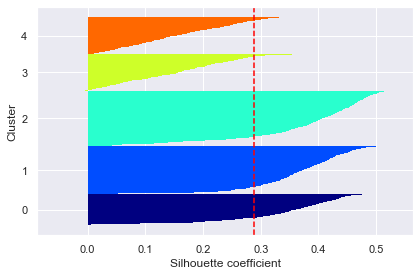

In [232]:
plot_silhouettes(X_norm, clusters)

In [233]:
'''
Next, compare your 7 clusters to the 7 pre-assigned classes by computing 
the Completeness and Homogeneity values of the generated clusters.
'''
from sklearn.metrics import completeness_score, homogeneity_score

print('The Completeness score: ',completeness_score(y, clusters))
print('The Homogeneity score: ',homogeneity_score(y, clusters))

The Completeness score:  0.0941507231665934
The Homogeneity score:  0.22865824423461512


The Homogeneity score that all the observations with the same class label are in the same cluster is 0.27, and Completeness that all members of the same class are in the same cluster is 0.9. 

Next we analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. we provide a plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.

In [147]:
from sklearn import decomposition

meanVals = np.mean(X_norm, axis = 0)
meanRemoved = X_norm - meanVals # remove mean
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=2, suppress = True, linewidth=100)
print(covMat)

[[ 0.06  0.01  0.01  0.04 -0.   -0.01 -0.   -0.01  0.    0.01 -0.01 -0.02]
 [ 0.01  0.25  0.02  0.05 -0.    0.01  0.   -0.01  0.02  0.01 -0.01 -0.03]
 [ 0.01  0.02  0.05  0.02 -0.   -0.    0.    0.    0.    0.01 -0.   -0.01]
 [ 0.04  0.05  0.02  0.21 -0.   -0.01  0.01 -0.03  0.01  0.01 -0.02 -0.04]
 [-0.   -0.   -0.   -0.    0.    0.    0.    0.   -0.   -0.    0.    0.  ]
 [-0.01  0.01 -0.   -0.01  0.    0.02 -0.01  0.   -0.   -0.01  0.    0.  ]
 [-0.    0.    0.    0.01  0.   -0.01  0.02  0.01  0.    0.01  0.    0.01]
 [-0.01 -0.01  0.   -0.03  0.    0.    0.01  0.03  0.   -0.    0.01  0.02]
 [ 0.    0.02  0.    0.01 -0.   -0.    0.    0.    0.02  0.01 -0.01 -0.01]
 [ 0.01  0.01  0.01  0.01 -0.   -0.01  0.01 -0.    0.01  0.02 -0.01 -0.01]
 [-0.01 -0.01 -0.   -0.02  0.    0.    0.    0.01 -0.01 -0.01  0.03  0.03]
 [-0.02 -0.03 -0.01 -0.04  0.    0.    0.01  0.02 -0.01 -0.01  0.03  0.06]]


In [149]:
import numpy.linalg as la
eigVals, eigVects = la.eig(np.mat(covMat))

In [150]:
print(eigVals)

[0.31 0.19 0.07 0.05 0.04 0.04 0.   0.02 0.01 0.01 0.01 0.01]


In [151]:
print(eigVects)

[[ 0.17  0.19 -0.4  -0.4   0.77 -0.1   0.    0.08 -0.06 -0.03 -0.06 -0.  ]
 [ 0.73 -0.67  0.09  0.04  0.07 -0.03 -0.   -0.03  0.04 -0.04 -0.   -0.03]
 [ 0.12  0.03  0.01 -0.66 -0.28  0.66  0.   -0.1  -0.04 -0.05  0.04  0.13]
 [ 0.59  0.7   0.36  0.15 -0.03  0.02  0.01  0.07  0.05 -0.01 -0.03 -0.05]
 [-0.01 -0.01  0.01 -0.    0.01 -0.    1.    0.   -0.01  0.02 -0.   -0.01]
 [-0.02 -0.07  0.04  0.28  0.18  0.45 -0.02  0.31 -0.57  0.47 -0.17 -0.11]
 [ 0.02  0.01  0.21 -0.32 -0.14 -0.43 -0.01 -0.12 -0.68 -0.01  0.36 -0.21]
 [-0.1  -0.09  0.2  -0.28 -0.05 -0.05 -0.01  0.71  0.28 -0.03  0.02 -0.53]
 [ 0.07 -0.01 -0.05 -0.11 -0.19 -0.27  0.01  0.55 -0.11  0.06 -0.04  0.74]
 [ 0.08  0.03 -0.09 -0.27 -0.21 -0.29 -0.01 -0.21  0.2   0.76 -0.34 -0.1 ]
 [-0.11 -0.06  0.4  -0.03  0.34  0.09 -0.01 -0.05  0.27  0.41  0.63  0.23]
 [-0.21 -0.11  0.66 -0.18  0.28 -0.06 -0.01 -0.14 -0.05 -0.16 -0.56  0.17]]


In [152]:
eigValInd = np.argsort(eigVals) # sort, sort goes smallest to largest
eigValInd = eigValInd[::-1] #reverse
sortedEigVals = eigVals[eigValInd]
print(sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals / total*100
print(varPercentage)

[0.31 0.19 0.07 0.05 0.04 0.04 0.02 0.01 0.01 0.01 0.01 0.  ]
[40.42 24.13  9.16  6.53  5.77  4.57  2.48  1.93  1.88  1.47  1.28  0.38]


In [153]:
var = 0
for i in range(10):
    var += varPercentage[i]/100
    print("{} PC: {}".format(i+1, round(var,4)))
    if var >= 0.95:
        break

1 PC: 0.4042
2 PC: 0.6455
3 PC: 0.7371
4 PC: 0.8024
5 PC: 0.8601
6 PC: 0.9058
7 PC: 0.9306
8 PC: 0.9499
9 PC: 0.9686


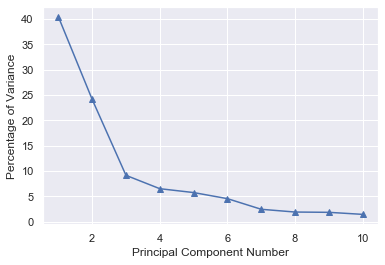

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), varPercentage[:10], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

From the scree plot above we can pick 6 components, since 7-10 not much difference.


We perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. 

In [156]:
'''
Analyze the principal components to determine the number, 
r, of PCs needed to capture at least 95% of variance in the data. 
'''
topNfeat = 7
topEigValInd = eigValInd[:topNfeat]
reducedEigVects = eigVects[:, topEigValInd]
reducedDT = np.dot(meanRemoved, reducedEigVects)
print(reducedDT)

[[ 0.68  0.   -0.1  ...  0.08  0.08 -0.05]
 [-0.07  0.62  0.13 ... -0.35  0.11  0.17]
 [-0.12  0.65  0.03 ...  0.05  0.   -0.18]
 ...
 [ 0.01 -0.75 -0.26 ...  0.16  0.36 -0.22]
 [-0.2  -0.89  0.23 ...  0.23  0.26 -0.06]
 [-0.57  0.15  0.41 ... -0.18 -0.3   0.16]]


In [157]:
kmeans = KMeans(n_clusters=7, max_iter=1000, verbose=0)
kmeans.fit(reducedDT)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [158]:
clusters = kmeans.predict(reducedDT)
clusters[:500]

array([0, 5, 5, 0, 6, 0, 4, 5, 0, 5, 6, 4, 6, 0, 6, 5, 0, 5, 4, 5, 5, 5, 5, 5, 5, 5, 0, 1, 0, 5, 5,
       2, 5, 5, 3, 5, 5, 4, 5, 0, 5, 6, 5, 5, 1, 0, 0, 5, 5, 6, 5, 1, 0, 5, 1, 0, 0, 0, 1, 5, 6, 5,
       5, 5, 5, 5, 5, 1, 4, 0, 1, 0, 5, 5, 0, 1, 0, 5, 5, 5, 0, 6, 5, 0, 5, 6, 1, 5, 0, 6, 6, 1, 5,
       0, 5, 5, 0, 0, 1, 6, 3, 2, 1, 6, 6, 5, 0, 6, 6, 0, 5, 1, 6, 6, 1, 0, 4, 6, 2, 0, 6, 6, 5, 6,
       5, 5, 5, 0, 5, 6, 0, 0, 0, 1, 6, 0, 6, 0, 5, 5, 6, 0, 1, 5, 4, 6, 5, 5, 0, 0, 6, 0, 0, 5, 6,
       0, 0, 1, 2, 0, 4, 5, 2, 0, 0, 5, 1, 6, 6, 6, 1, 1, 0, 6, 6, 6, 0, 0, 6, 0, 6, 5, 0, 6, 5, 0,
       0, 0, 0, 6, 0, 1, 6, 0, 0, 6, 1, 0, 6, 6, 6, 5, 0, 5, 6, 6, 6, 6, 6, 5, 6, 0, 0, 0, 6, 6, 6,
       1, 2, 0, 6, 6, 6, 5, 6, 0, 0, 1, 5, 0, 0, 0, 6, 5, 6, 0, 6, 0, 6, 0, 0, 2, 0, 6, 5, 0, 0, 5,
       0, 0, 5, 0, 6, 0, 5, 6, 6, 5, 5, 5, 6, 5, 5, 0, 0, 0, 5, 5, 0, 0, 6, 6, 5, 6, 1, 0, 5, 1, 0,
       5, 5, 0, 6, 5, 4, 5, 0, 5, 5, 0, 0, 0, 0, 6, 0, 5, 0, 0, 2, 2, 0, 6, 0, 0, 5, 5, 6, 5, 0, 6,


In [159]:
pd.options.display.float_format = '{:,.2f}'.format
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids

,0,1,2,3,4,5,6
0,0.70,-0.01,-0.18,0.05,-0.03,-0.03,-0.01
1,-0.24,0.53,0.26,0.07,-0.02,-0.00,0.01
2,-0.00,-0.75,-0.03,-0.03,0.05,-0.00,0.01
3,-0.81,-0.13,0.08,-0.01,-0.04,-0.02,-0.01
4,-0.66,-0.02,-0.31,-0.01,-0.01,0.05,0.00
5,-0.04,0.68,-0.15,-0.06,0.05,0.00,0.01
6,0.59,-0.08,0.24,-0.02,0.01,0.03,-0.00


In [160]:
'''
compare Silhouette values as well as completeness and 
Homogeneity values of the new clusters. 
Compare these results with those obtained on the full data in part b.
'''

silhouettes = metrics.silhouette_samples(reducedDT,clusters)
print(silhouettes.mean())

0.22640305859708648


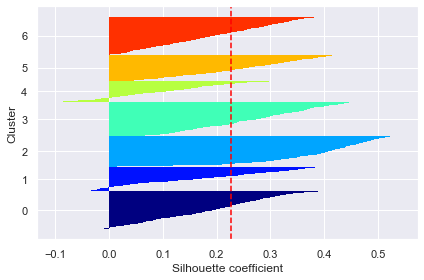

In [161]:
plot_silhouettes(reducedDT,clusters)

In [162]:
print("Completeness score: ", completeness_score(y, clusters))
print("Homogeneity score: ", homogeneity_score(y, clusters))

Completeness score:  0.08943411206425572
Homogeneity score:  0.263762141501357


There is a small difference between scores, however mean slihouettes of original dimensions are higher than reduced.